In [1]:
from sklearn import metrics
from sklearn.cluster import DBSCAN
import numpy as np
    
import pandas as pd 

import matplotlib.pyplot as plt


In [3]:
X = [[1, 2],
     [2, 1],
     [1, 1],
     [2, 2],
     [8, 9],
     [9, 8],
     [9, 9],
     [8, 8],
     [1, 15],
     [2, 15],
     [1, 14],
     [2, 14]]

In [4]:
result = DBSCAN(eps=0.1, min_samples=2).fit(X)

In [5]:
result.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [6]:
from sklearn.datasets import load_iris
iris = load_iris()

X = iris.data[:,:4]


In [7]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [8]:
result = DBSCAN(eps=1, min_samples=5).fit(X)
core_samples_mask = np.zeros_like(result.labels_, dtype=bool)
core_samples_mask[result.core_sample_indices_] = True
labels = result.labels_

In [9]:
ngrupos = len(set(result.labels_))
print(ngrupos)

2


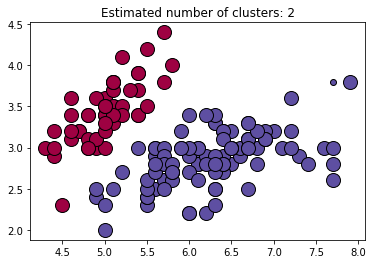

In [10]:
import matplotlib.pyplot as plt

unique_labels = set(result.labels_)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (result.labels_ == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % ngrupos)
plt.show()


Sobre o DBSCan no Scki-kit Learn:
http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html